In [2]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

In [3]:
MNIST_URL='https://github.com/mnielsen/rmnist/blob/master/data/mnist.pkl.gz?raw=true'
path = datasets.download_data(MNIST_URL, ext='.gz')
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [4]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [5]:
img = x_train[0].view(28,28)

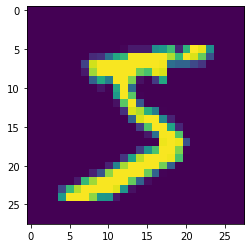

In [6]:
plt.imshow(img)

In [7]:
weights, bias = torch.randn(784,10), torch.randn(10)

In [8]:
def matmul1(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c
    

In [9]:
m1 = x_valid[:5]
m2 = weights

In [10]:
%timeit t1 = matmul1(m1, m2)

844 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
def matmul2(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            
                c[i,j] = (a[i] * b[:,j]).sum()
    return c

In [12]:
%timeit -n 10 t1 = matmul2(m1, m2)

1.23 ms ± 264 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
# Frobenius norm of a matrix (sum of squares of all elements)
def norm(a):
    return (a*a).sum().sqrt()

In [14]:
a = torch.tensor([10.,  6., -4.])

In [15]:
a > 0

tensor([ True,  True, False])

In [16]:
a+1

tensor([11.,  7., -3.])

In [17]:
2*a

tensor([20., 12., -8.])

In [18]:
c  = torch.tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [19]:
c.shape, a.shape

(torch.Size([3, 3]), torch.Size([3]))

In [20]:
a + c

tensor([[11.,  8., -1.],
        [14., 11.,  2.],
        [17., 14.,  5.]])

In [21]:
a.expand_as(c)

tensor([[10.,  6., -4.],
        [10.,  6., -4.],
        [10.,  6., -4.]])

In [22]:
a.storage()

 10.0
 6.0
 -4.0
[torch.FloatStorage of size 3]

In [23]:
c.stride()

(3, 1)

In [24]:
c

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [25]:
a.unsqueeze(-1), a

(tensor([[10.],
         [ 6.],
         [-4.]]),
 tensor([10.,  6., -4.]))

In [26]:
a.unsqueeze(0).shape

torch.Size([1, 3])

In [27]:
a[None,:].shape

torch.Size([1, 3])

In [28]:
a[:,None].shape

torch.Size([3, 1])

In [29]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
                c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)
    return c

In [30]:
%timeit -n 10 t1 = matmul(m1, m2)

226 µs ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
import numpy as np

In [33]:
a = np.arange(25).reshape(5,5)

In [34]:
b = np.arange(5)

In [35]:
c = np.arange(6).reshape(2,3)

In [50]:
a, b

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([0, 1, 2, 3, 4]))

In [40]:
np.einsum('ij', a)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [41]:
6+12+18+24

60

In [61]:
np.einsum('ij-> i', a) == np.sum(a, axis=1)

array([ True,  True,  True,  True,  True])

In [55]:
np.einsum('ij-> j', a) == np.sum(a, axis=0)

array([ True,  True,  True,  True,  True])

In [63]:
np.einsum('ii-> i', a)

array([ 0,  6, 12, 18, 24])

In [106]:
%timeit -n 10 t = torch.einsum('ik,kj->ij', m1, m2)

37.9 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
%timeit -n 10 t = m1@m2

The slowest run took 13.54 times longer than the fastest. This could mean that an intermediate result is being cached.
26.7 µs ± 32.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
